# Análisis de Regresión Lineal Simple: Predicción de Puntos por Juego Basado en la Altura del Jugador

## Introducción

En este cuadernillo, realizaremos un análisis de regresión lineal simple utilizando un dataset de la NBA. La regresión lineal simple es una técnica de modelado que busca explicar la relación entre una variable dependiente (en este caso, los rebotes por juego) y una variable independiente (los puntos por patido).

El objetivo es predecir los puntos que un jugador puede anotar en promedio por juego (`puntos_por_juego`) basado en sus rebotes (`rebotes`).

Este analisis nace dese la idea de que los jugadores que realizan mayor cantidad de puntos suelen reducir sus estadisticas en otros campos como lo seria de los rebotes

## Preparación de los Datos

El primer paso para comenzar es la inclusion de las librerias


In [1]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

#Pandas es una biblioteca fundamental para la manipulación y análisis de datos en Python
import pandas as pd

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D
import matplotlib.pyplot as plt

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

## Analizando los Datos

Haremos una traduccion e imprecion de los datos para que podamos apreciar como es el dataset

Nuestro dataset cuenta con los datos de todos los jugadores que pisaron la NBA en las ultimas decadas, asi tambien cuenta con las estadisticas de como rindieron en la liga lo que ayuda a predecir el posible rendimiento de los jugadores futuros


In [2]:
# Cargar el dataset
file_path = 'all_seasons.csv'
nba_data = pd.read_csv(file_path)

# Traducción de las cabezas del dataset al español
columnas_traduccion = {
    'Unnamed: 0': 'indice',
    'player_name': 'nombre_jugador',
    'team_abbreviation': 'abreviatura_equipo',
    'age': 'edad',
    'player_height': 'altura_jugador',
    'player_weight': 'peso_jugador',
    'college': 'universidad',
    'country': 'pais',
    'draft_year': 'año_draft',
    'draft_round': 'ronda_draft',
    'draft_number': 'numero_draft',
    'gp': 'juegos_jugados',
    'pts': 'puntos_por_juego',
    'reb': 'rebotes',
    'ast': 'asistencias',
    'net_rating': 'valoracion_neta',
    'oreb_pct': 'porcentaje_rebotes_ofensivos',
    'dreb_pct': 'porcentaje_rebotes_defensivos',
    'usg_pct': 'porcentaje_uso',
    'ts_pct': 'porcentaje_tiros_efectivos',
    'ast_pct': 'porcentaje_asistencias',
    'season': 'temporada'
}

# Aplicar traducción a las columnas
nba_data_esp = nba_data.rename(columns=columnas_traduccion)

# Mostrar las primeras filas con las nuevas columnas traducidas
nba_data_esp.head()


FileNotFoundError: [Errno 2] No such file or directory: 'all_seasons.csv'

## 1 Regresión lineal con una variable

El archivo `all_seasons.csv` contiene el dataset para el problema de regresion lineal.

In [ ]:
# Leer el archivo CSV con pandas
df = pd.read_csv('all_seasons.csv')


# Dividir los datos en características (X) y etiquetas (y), si es necesario
X = df.iloc[:, 12].values
y = df.iloc[:, 13].values

m = y.size  # m = número de ejemplos de entrenamiento


### Mostramos los datos que separamos del Dataset


In [ ]:
print(X)

[ 3.9  3.8  8.3 ... 13.1  3.4  6.4]


In [ ]:
print(y)

[1.5 1.3 6.4 ... 6.5 4.7 3.6]


### Mostramos el numero de datos con los que contamos

In [ ]:
print(X.size)

12844


### 1.1 Trazar los datos
 
El trazado de los datos nos ayuda a entender de manera grafica nuestros datos, para lo cual nos ayudaremos de la siguiente funcion.

In [ ]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura

    pyplot.plot(x, y, 'go', ms=8, mec='k')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')


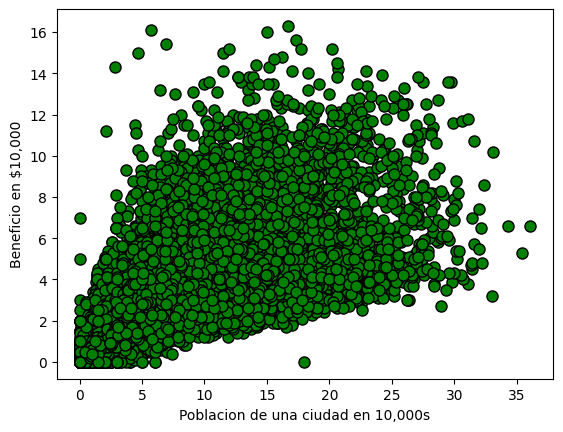

In [ ]:
plotData(X, y)

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [ ]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

In [ ]:
# Mostramos los primeros 5 ejemplos con el valor de X agregado
print(X)

[[ 1.   3.9]
 [ 1.   3.8]
 [ 1.   8.3]
 ...
 [ 1.  13.1]
 [ 1.   3.4]
 [ 1.   6.4]]


<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [ ]:
def computeCost(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    # h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [ ]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('------------------------------------------------------------\n')

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('------------------------------------------------------------\n')

Con theta = [0, 0] 
 Costo calculado = 9.40
------------------------------------------------------------

Con theta = [-1, 2]
 Costo calculado = 127.25
------------------------------------------------------------



<a id="section3"></a>
#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

<div class="alert alert-box alert-warning">
**Vectores y matrices en `numpy`** - Importantes notas para implementación
Un vector en `numpy` es un array de una diemension, por ejemplo `np.array([1, 2, 3])` es un vector. Una matriz en `numpy` is un arreglo de dos dimensiones, por ejemplo  `np.array([[1, 2, 3], [4, 5, 6]])`. Sin embargo, lo siguiente todavía se considera una matriz `np.array ([[1, 2, 3]])` ya que tiene dos dimensiones, incluso si tiene una forma de 1x3 (que parece un vector).

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.01.

In [ ]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 125000
alpha = 0.001

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')

Theta encontrada por descenso gradiente: 1.4462, 0.2572
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]


Se utilizan los parametros finales para grafical la linea.

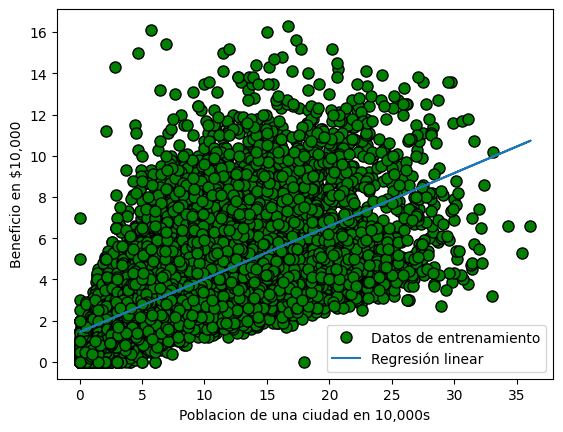

In [ ]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear'])

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [ ]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 35], theta)
print('Para un jugador que promdia 35 puntos por partiod {:.2f}\n'.format(predict1))

predict2 = np.dot([1, 3], theta)
print('Para un jugador que promdia 3 puntos por partiod {:.2f}\n'.format(predict2))

Para un jugador que promdia 35 puntos por partiod 10.45

Para un jugador que promdia 3 puntos por partiod 2.22



### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

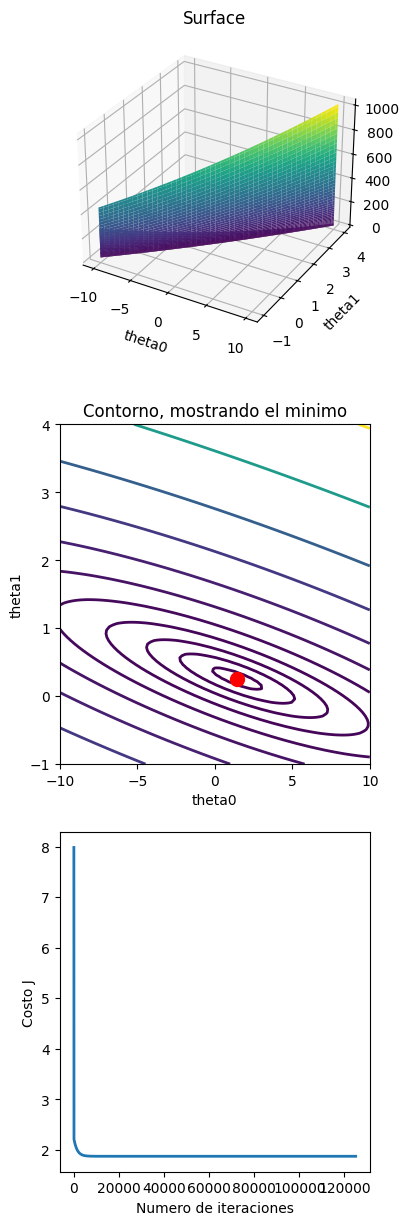

In [ ]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass

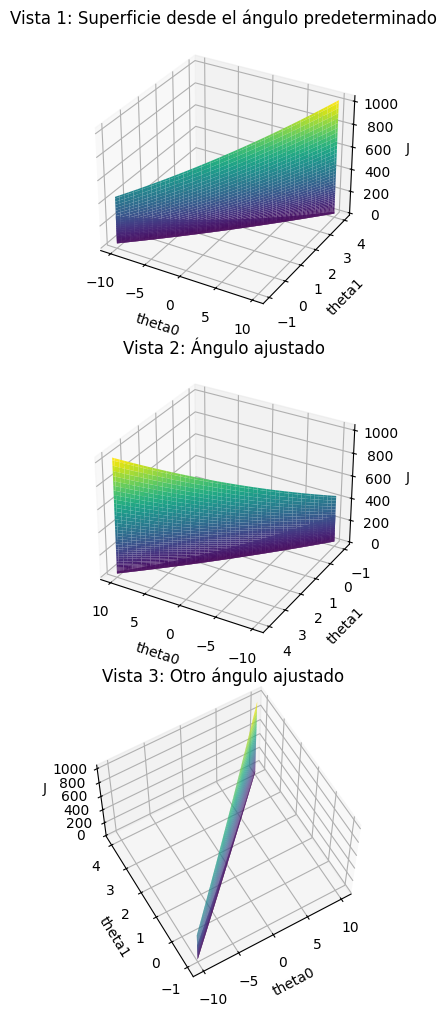

In [ ]:
fig = plt.figure(figsize=(12, 10))

# Primera vista
ax1 = fig.add_subplot(311, projection='3d')
ax1.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax1.set_xlabel('theta0')
ax1.set_ylabel('theta1')
ax1.set_zlabel('J')
ax1.set_title('Vista 1: Superficie desde el ángulo predeterminado')

# Segunda vista
ax2 = fig.add_subplot(312, projection='3d')
ax2.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax2.view_init(elev=30, azim=120)  # Cambiar elevación y ángulo de azimut
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.set_zlabel('J')
ax2.set_title('Vista 2: Ángulo ajustado')

# Tercera vista
ax3 = fig.add_subplot(313, projection='3d')
ax3.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
ax3.view_init(elev=60, azim=240)  # Cambiar elevación y ángulo de azimut
ax3.set_xlabel('theta0')
ax3.set_ylabel('theta1')
ax3.set_zlabel('J')
ax3.set_title('Vista 3: Otro ángulo ajustado')

plt.tight_layout()
plt.show()